# Getting Notebook Ready

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

df = pd.read_excel(r'C:\Users\ayush\Downloads\TechNext_Intern\Online_retail.xlsx')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Task1 (EXPLORATORY DATA ANALYSIS (EDA) ON RETAIL DATA)

## Data Cleaning

In [2]:
df.info()

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df = df.dropna()

df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Key KPIs

In [3]:
total_sales = df['TotalPrice'].sum()
avg_order_value = df.groupby('InvoiceNo')['TotalPrice'].sum().mean()
revenue_per_category = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print(f"Total Sales: £{total_sales:,.2f}")
print(f"Average Order Value: £{avg_order_value:,.2f}")

Total Sales: £8,911,407.90
Average Order Value: £480.87


## Sales Trends

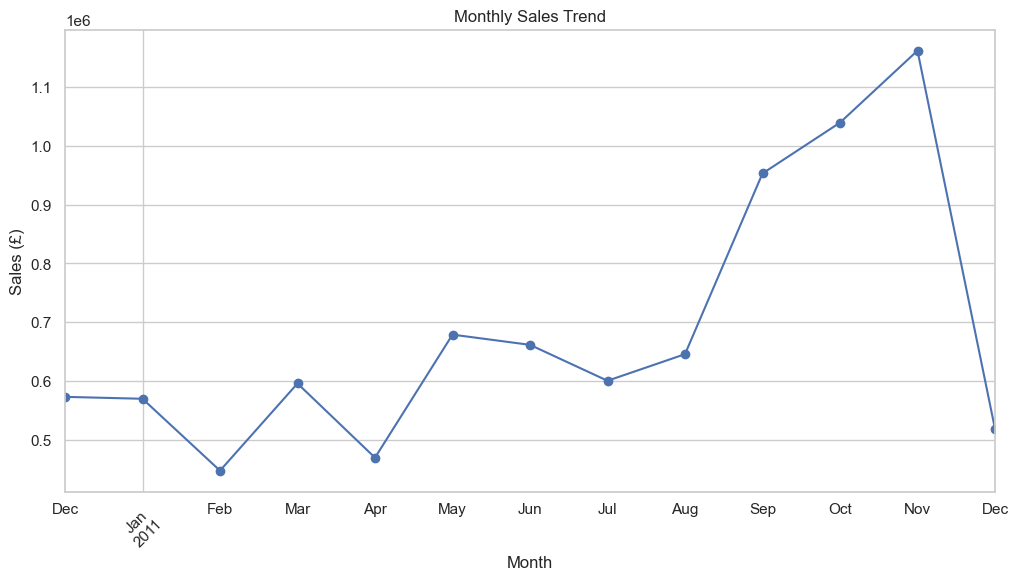

In [4]:
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['TotalPrice'].sum()

monthly_sales.plot(kind='line', marker='o', title="Monthly Sales Trend")
plt.ylabel("Sales (£)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

## Visualizations

### A. Revenue by Top 10 Categories

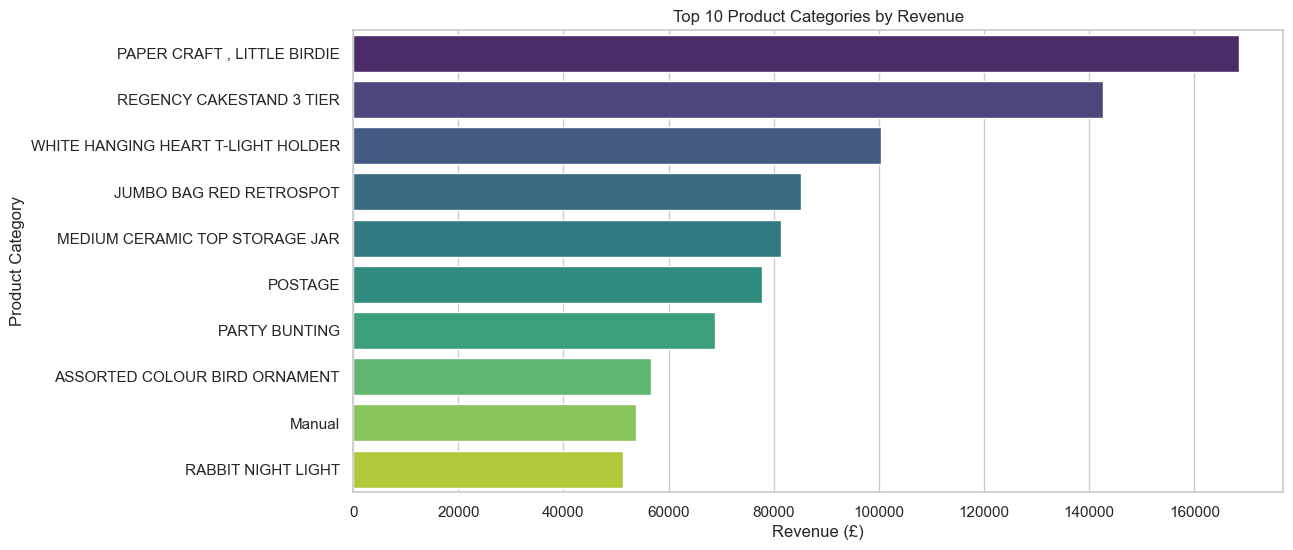

In [5]:
sns.barplot(x=revenue_per_category.values, y=revenue_per_category.index, palette="viridis")
plt.title("Top 10 Product Categories by Revenue")
plt.xlabel("Revenue (£)")
plt.ylabel("Product Category")
plt.show()

### Sales by Country

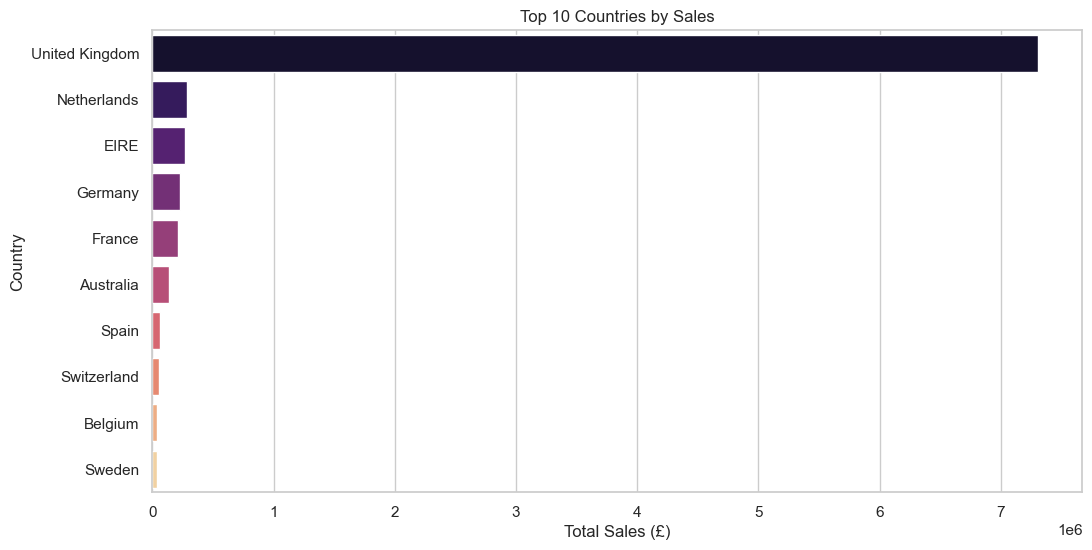

In [6]:
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=country_sales.values, y=country_sales.index, palette="magma")
plt.title("Top 10 Countries by Sales")
plt.xlabel("Total Sales (£)")
plt.ylabel("Country")
plt.show()

### Average Order Value Distribution

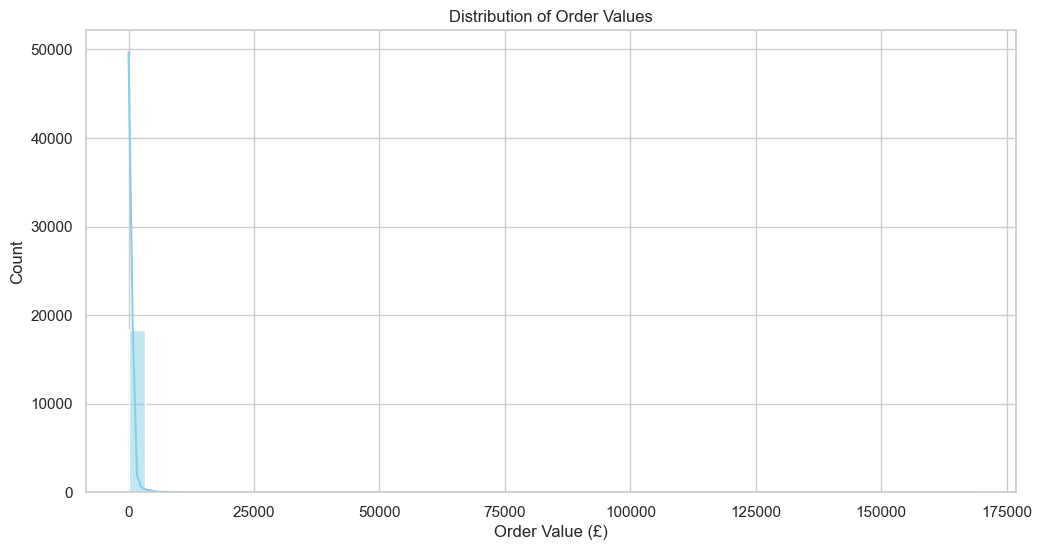

In [7]:
order_values = df.groupby('InvoiceNo')['TotalPrice'].sum()
sns.histplot(order_values, bins=50, kde=True, color='skyblue')
plt.title("Distribution of Order Values")
plt.xlabel("Order Value (£)")
plt.show()